In [1]:
# for modifying and manipulating the data
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)

# for visualization purposes
import matplotlib.pyplot as plt
import seaborn as sns

Loading the data...

In [2]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Getting more info about the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> We can see that the `TotalChrages` column has wrong format

Investigating the NaNs

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Let's see if we could use `customerID`

In [6]:
df['customerID'].nunique()

7043

In [7]:
df.shape

(7043, 21)

> All the customers are unique. so they are not useful right now.

# Summary:

##### We can see that there are:
   - _Useless columns_  : "customerID"
   - _Wrong-format Columns_ : 
      - _toFloat_  : "TotalCharges"
      - _toObject_ : "SeniorCitizen"	( that is not important but i like it to be 'Yes' and 'No' )
      
   - _The columns' naming is not **unified**_

# Cleaning

Dropping the useless column

In [8]:
df.drop('customerID', axis=1, inplace=True)

Uncovering the hidden NaNs

In [9]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

- **Check**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Let's see if that made some NaNs

In [11]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Let's take a closer look on these missing values

In [12]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


> As we can see the are all "No" category

Let's look at our Churn distribution

In [13]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

> from the above distribution we can see that the data is very unbalanced. That's why i will not bother my self of filling these NaNs (the "No" category has already higher number of records).

In [14]:
df.dropna(inplace=True)

- **Check**

In [15]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Alright. Now for my convenience i will edit some columns: <br><br>
○ Their _values_ like: <br>
&nbsp;&nbsp;&nbsp;&nbsp;• SeniorCitizen

○ Their _names_ like:<br>
&nbsp;&nbsp;&nbsp;&nbsp;• "gender" to "Gender"<br>
&nbsp;&nbsp;&nbsp;&nbsp;• "tenure" to "Tenure"

Their values

In [17]:
df['SeniorCitizen'].replace({0:'No', 1:'Yes'}, inplace=True)

- **Check**

In [18]:
df['SeniorCitizen'].unique()

array(['No', 'Yes'], dtype=object)

Their names

In [19]:
df.rename(columns={'gender': 'Gender',
                   'tenure': 'Tenure'}, inplace=True)

- **Check**

In [20]:
df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<h2 align='center'> Now, We're ready to begin our Analysis ☺ </h2>

Before diving deeper in our Analysis let's first **divide** our data into three different aspects:
- Demographic 
- Services 
- Account

In [21]:
Demographic_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']
Services_cols    = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
Account_cols_cat = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Account_cols_num = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

### Demographic Features...

#### Univariate Exploration 

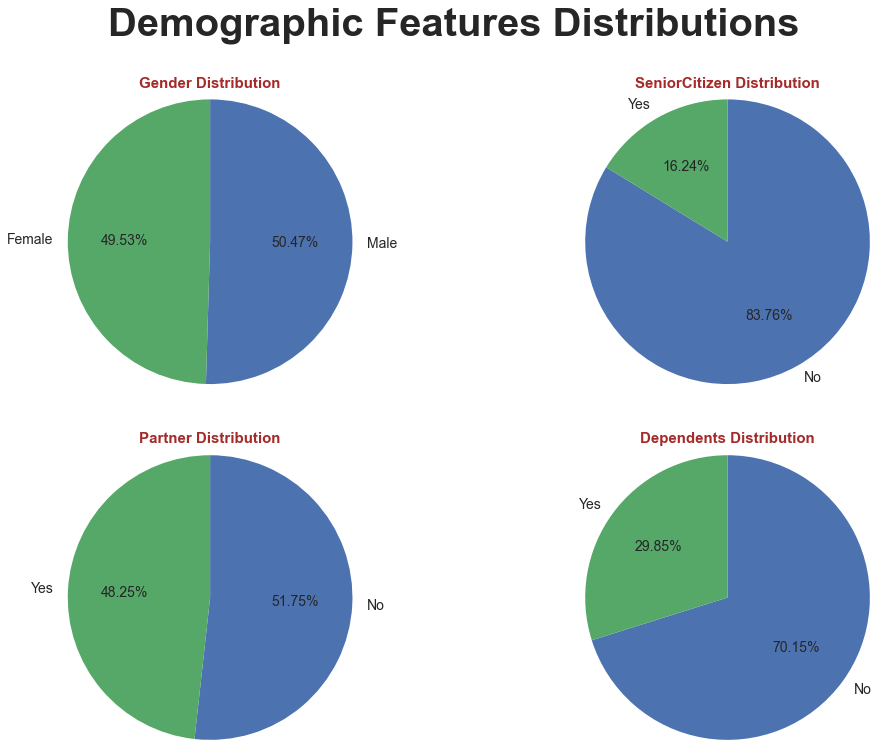

In [24]:
fig = plt.figure(figsize=(17, 12))
fig.suptitle('Demographic Features Distributions', fontsize=40, weight='bold')

for i, col in enumerate(Demographic_cols[:-1]):
    sorted_counts = df[col].value_counts()
    plt.subplot(2, 2, i+1)
    plt.pie(sorted_counts.values, labels = sorted_counts.index, startangle = 90, autopct='%.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 14})
    plt.title(f'{col} Distribution', fontsize=15, weight='bold', color='brown', loc='center')

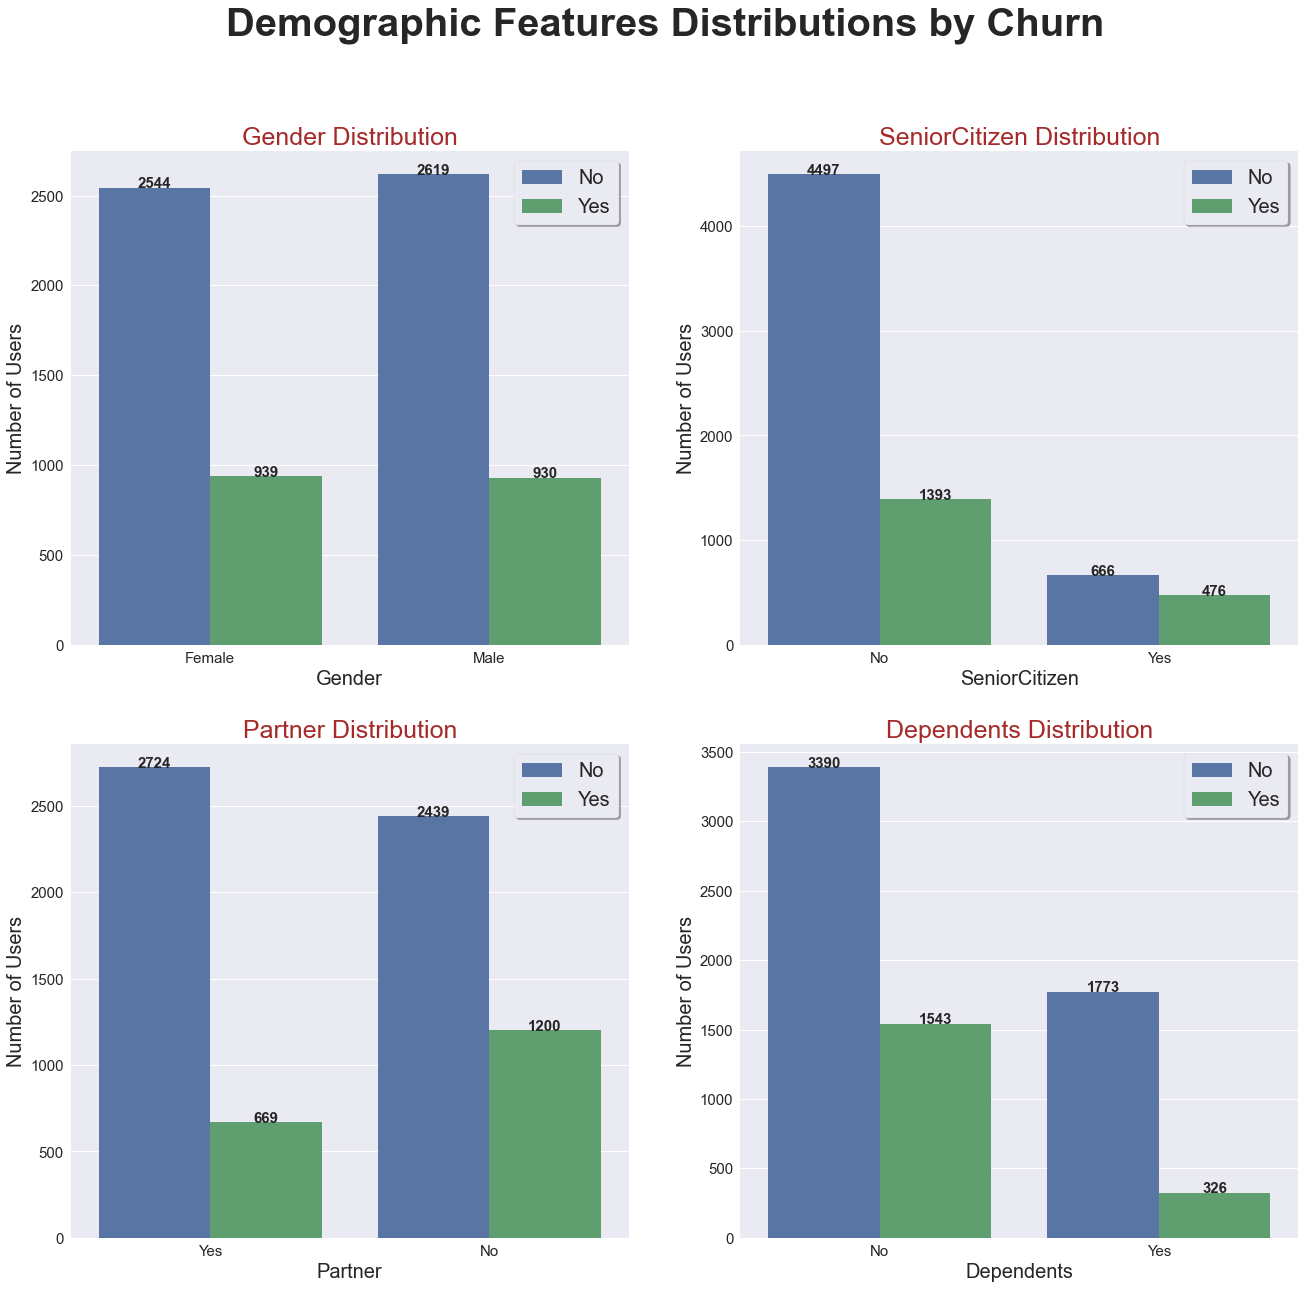

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,20))
fig.suptitle('Demographic Features Distributions by Churn', fontsize=40, weight='bold')
axes = axes.ravel()
for i, col in enumerate(Demographic_cols[:-1]):
    fig.sca(axes[i])
    ax = sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight='bold', ha='center')
    
    plt.title(f"{col} Distribution", fontsize=25, color='brown')
    plt.xlabel(col, fontsize=20)
    plt.xticks(fontsize=15)
        
    plt.ylabel('Number of Users', fontsize=20)
    plt.yticks(fontsize=15);
    
    plt.legend(labels=list(df['Churn'].unique()),  prop={"size":20}, frameon=True, shadow=True);

Just playing 

for [more information](https://matplotlib.org/stable/gallery/ticks_and_spines/tick-formatters.html) about tick formatters

In [108]:
import matplotlib.ticker as mtick # For specifying the axes tick format

In [175]:
colors = ['#4D3425','#E4512B']
test = df.groupby(['Gender','Churn']).size().unstack()

test = (test*100.0 / test.values.sum(axis=1).reshape(-1, 1))

In [167]:
test = df.groupby(['Gender','Churn']).size().unstack()

In [168]:
test

Churn,No,Yes
Gender,,
Female,2544,939
Male,2619,930


In [173]:
test.values.sum(axis=1).reshape(-1, 1)

array([[3483],
       [3549]], dtype=int64)

In [174]:
(test*100.0 / test.values.sum(axis=1).reshape(-1, 1))

Churn,No,Yes
Gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


<BarContainer object of 2 artists>

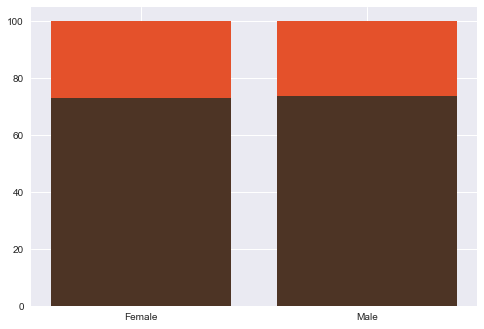

In [176]:
plt.bar(x=test.index, height=test.iloc[:, 0], color=colors[0])
plt.bar(x=test.index, height=test.iloc[:, 1], bottom=test.iloc[:, 0], color=colors[1])

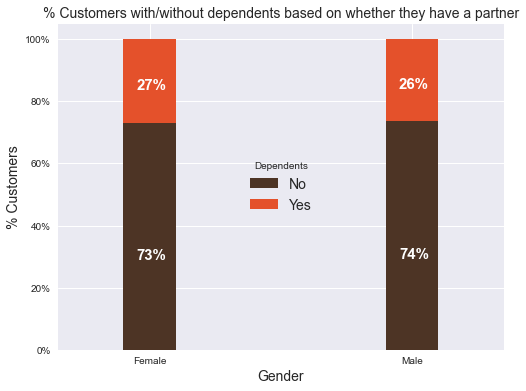

In [178]:
colors = ['#4D3425','#E4512B']
partner_dependents = df.groupby(['Gender','Churn']).size().unstack()

ax = (partner_dependents*100.0 / partner_dependents.values.sum(axis=1).reshape(-1, 1)).plot(kind='bar',
                                                                                            width = 0.2,
                                                                                            stacked = True,
                                                                                            rot = 0, 
                                                                                            figsize = (8,6),
                                                                                            color = colors)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% Customers',size = 14)
ax.set_title('% Customers with/without dependents based on whether they have a partner',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    #ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
        #        color = 'white',
          #     weight = 'bold',
           #    size = 14)
    
    ax.text(x+.25*width, y+.4*height, '{:.0f}%'.format(height), color = 'white', weight = 'bold', fontsize=15)

#### Multivariate Exploration

In [94]:
grid.axes.ravel()[0]

<AxesSubplot:title={'center':'Dependents = No | Partner = Yes'}, ylabel='count'>

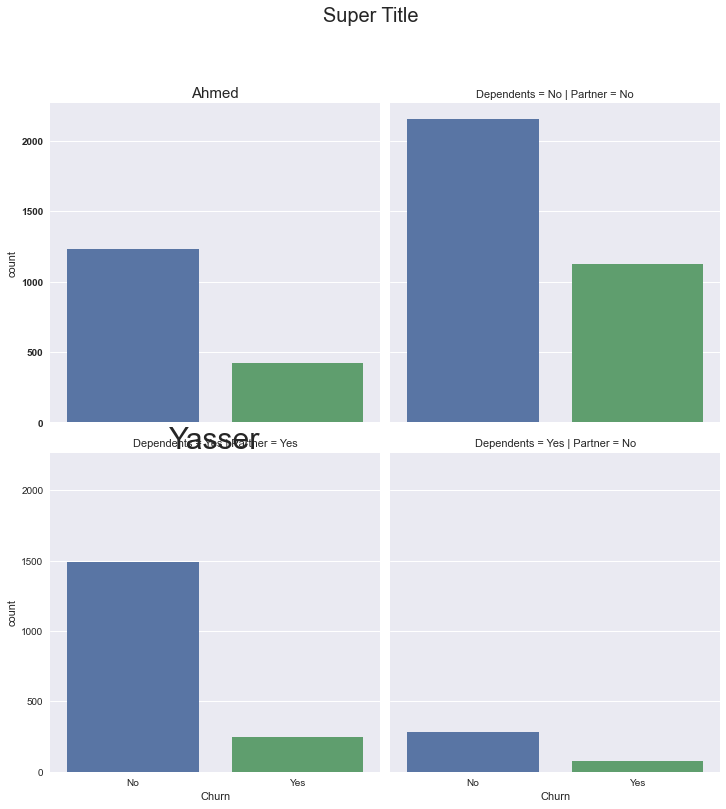

In [106]:
grid = sns.catplot(data=df, x='Churn', col='Partner', row='Dependents', kind='count');
grid.fig.suptitle('Super Title', y=1.1, fontsize=20)

grid.fig.sca(grid.axes.ravel()[0])
plt.title('Ahmed', fontsize=15)
plt.xlabel('Yasser', fontsize=30)

plt.yticks(weight='bold');

### Services Features...

#### Univariate Exploration

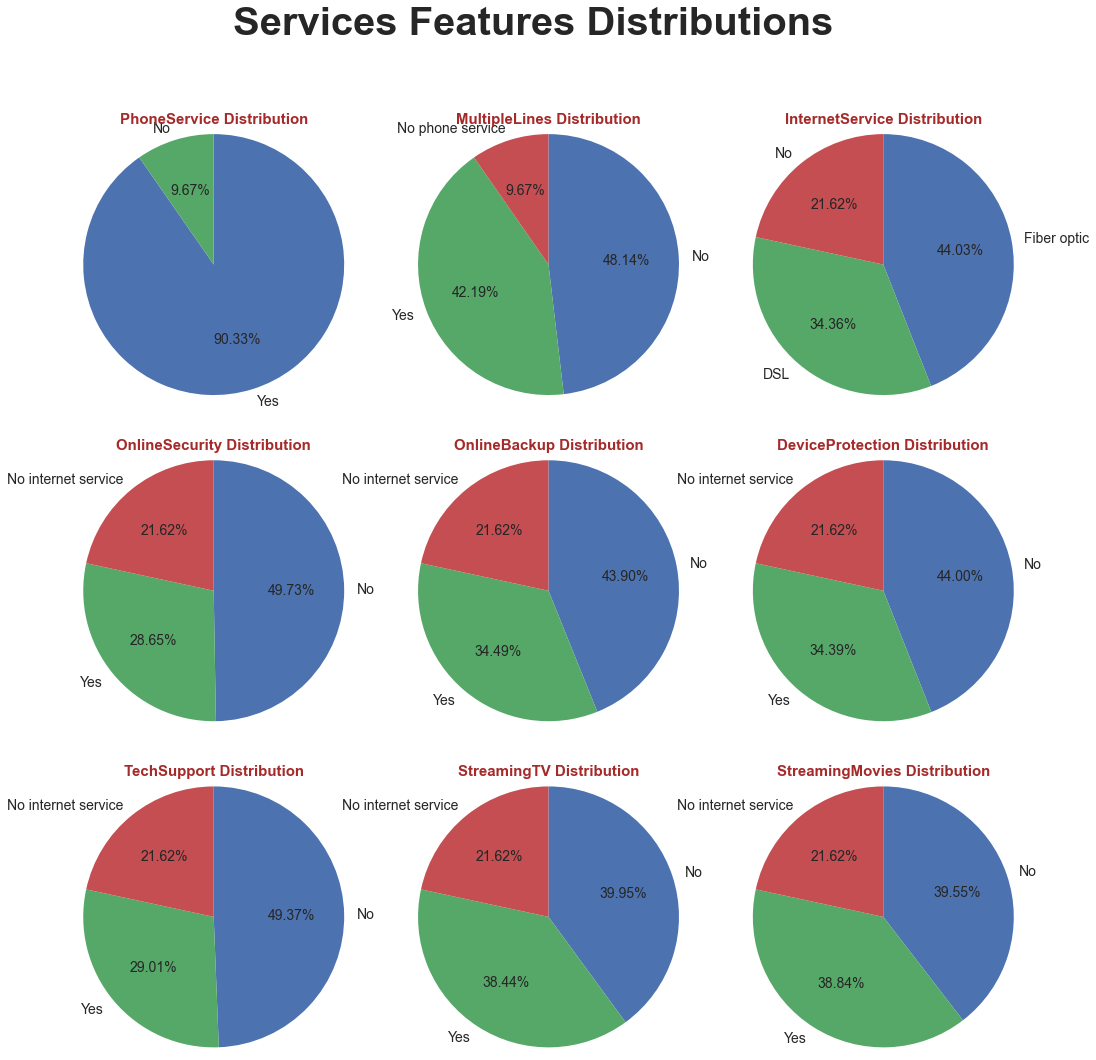

In [32]:
fig = plt.figure(figsize=(17, 17))
fig.suptitle('Services Features Distributions', fontsize=40, weight='bold')

for i, col in enumerate(Services_cols[:-1]):
    sorted_counts = df[col].value_counts()
    plt.subplot(3, 3, i+1)
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 14})
    plt.title(f'{col} Distribution',fontsize=15, weight='bold', color='brown', loc='center')

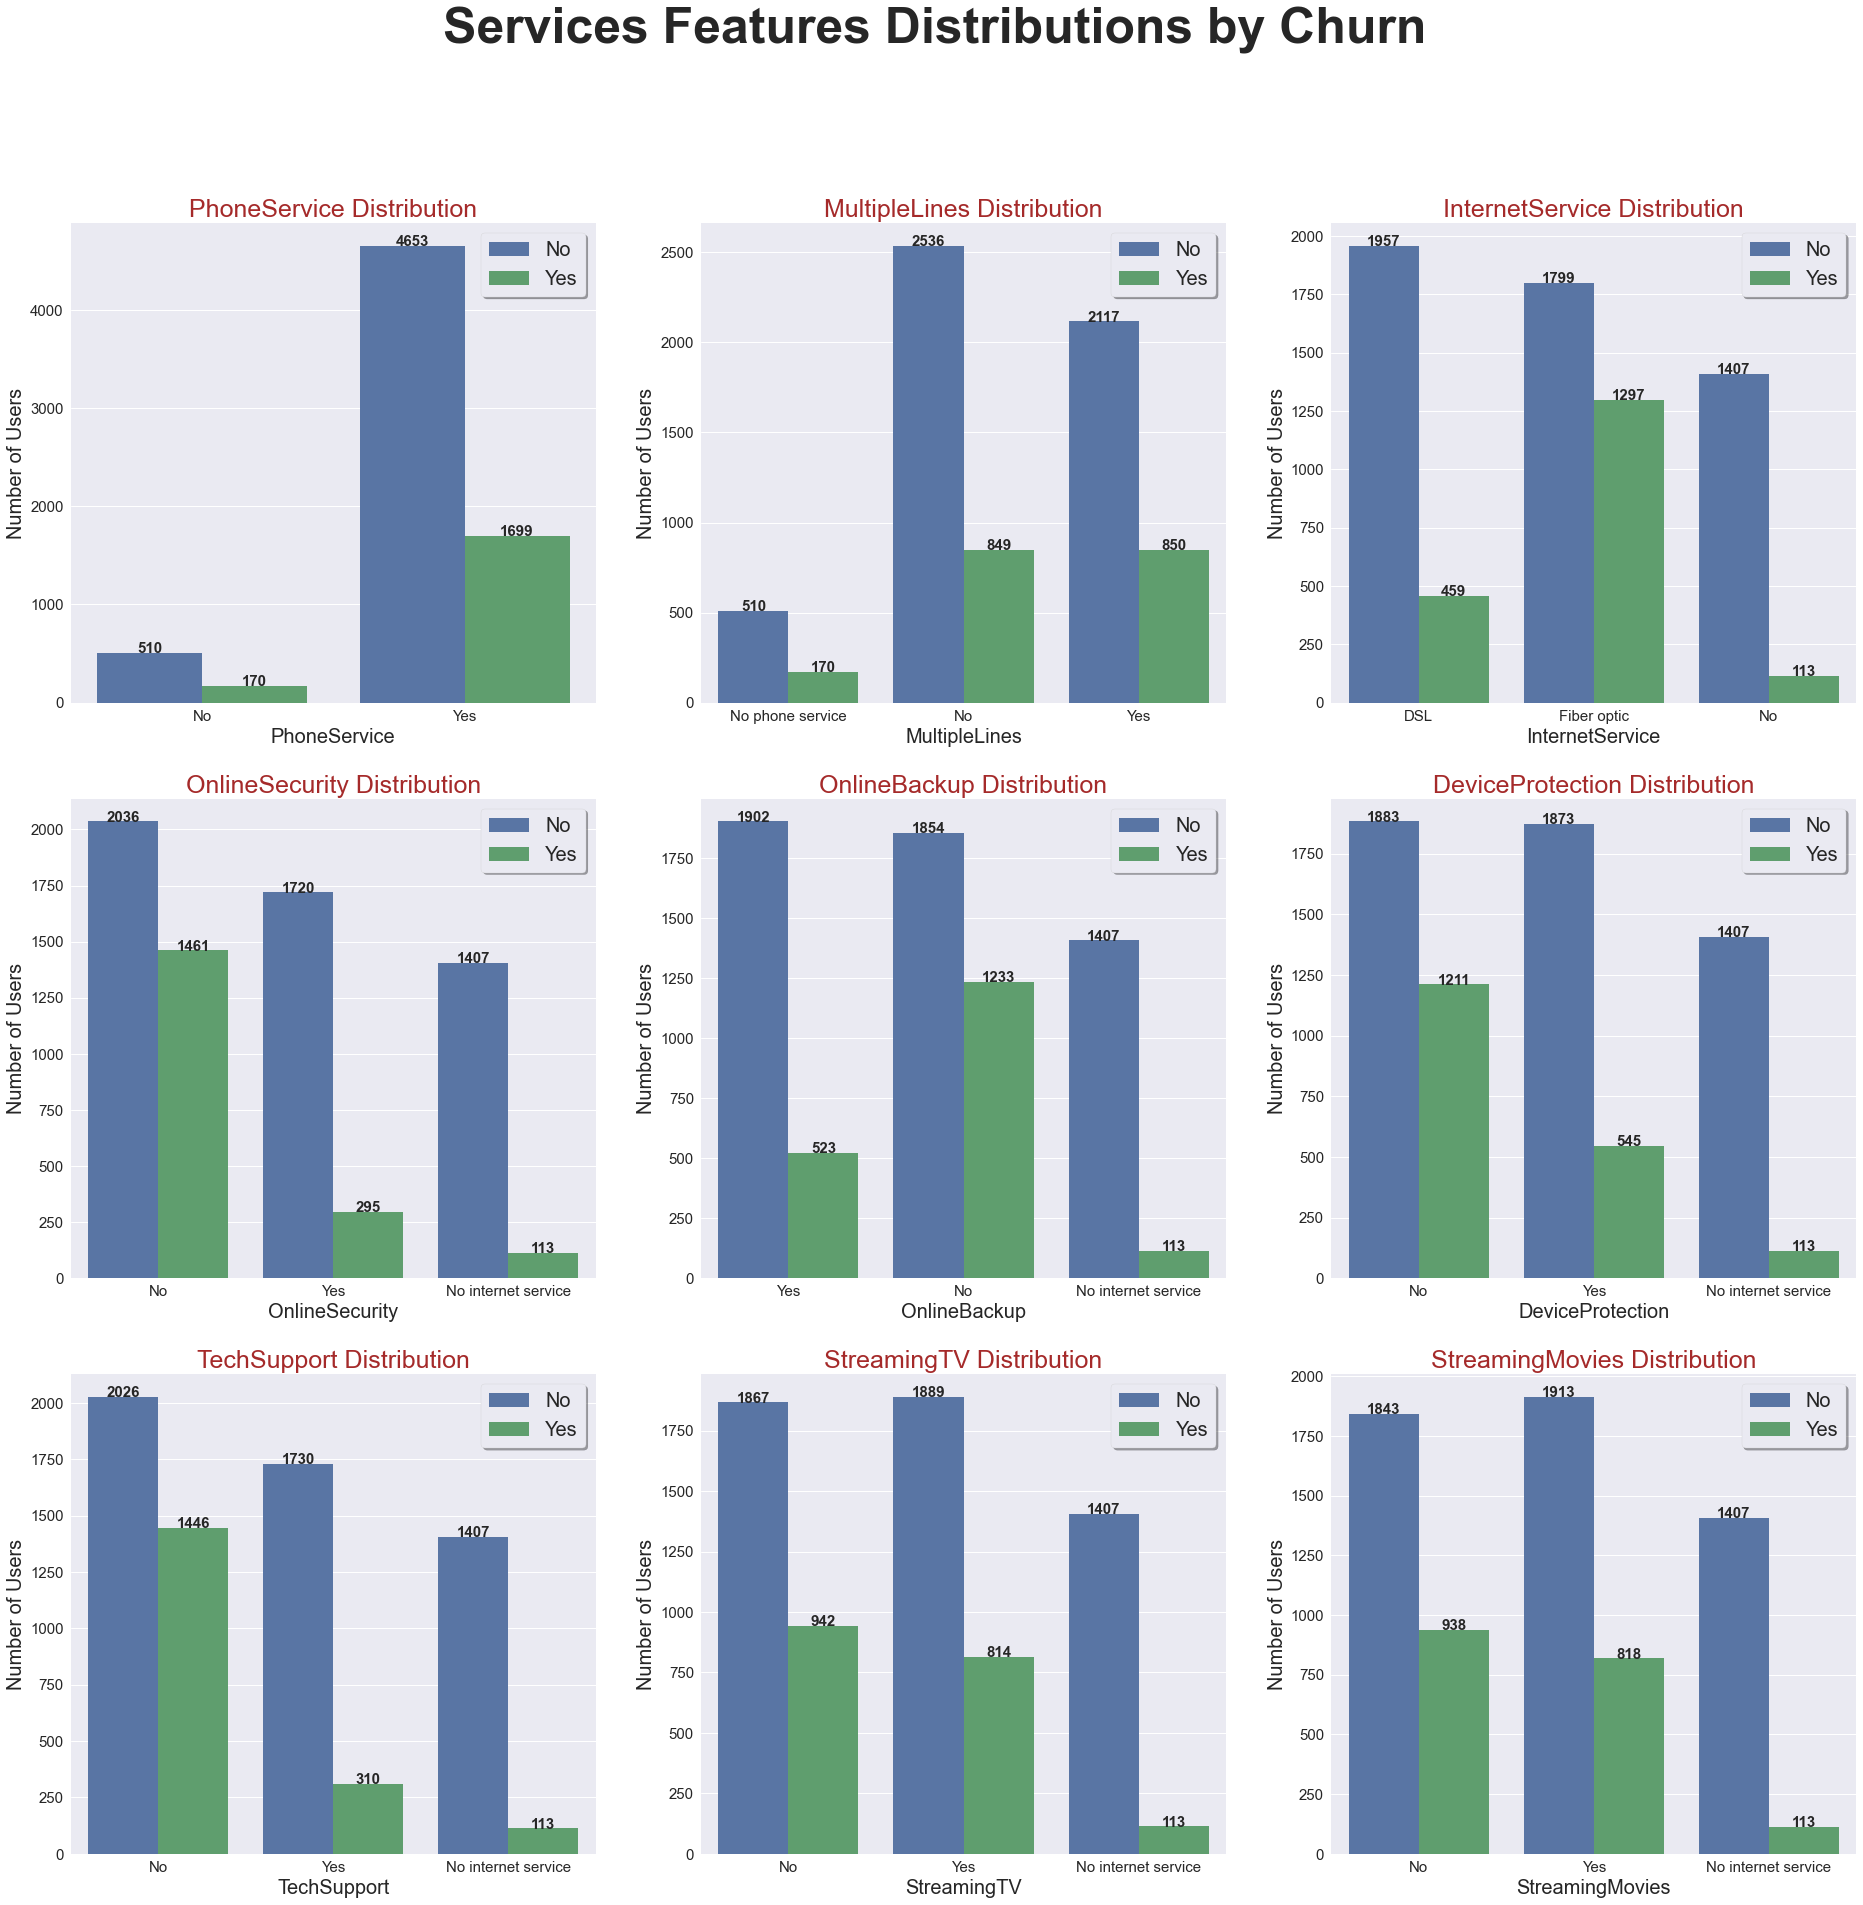

In [33]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (32,30))
fig.suptitle('Services Features Distributions by Churn', fontsize=50, weight='bold')

axes = axes.ravel()
for i, col in enumerate(Services_cols[:-1]):
    fig.sca(axes[i])
    ax = sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight='bold', ha='center')
    
    plt.title(f"{col} Distribution", fontsize=25, color='brown')
    plt.xlabel(col, fontsize=20)
    plt.xticks(fontsize=15)
        
    plt.ylabel('Number of Users', fontsize=20)
    plt.yticks(fontsize=15);
    
    plt.legend(labels=list(df['Churn'].unique()),  prop={"size":20}, frameon=True, shadow=True);

### Categorical Account Features...

#### Univariate Exploration

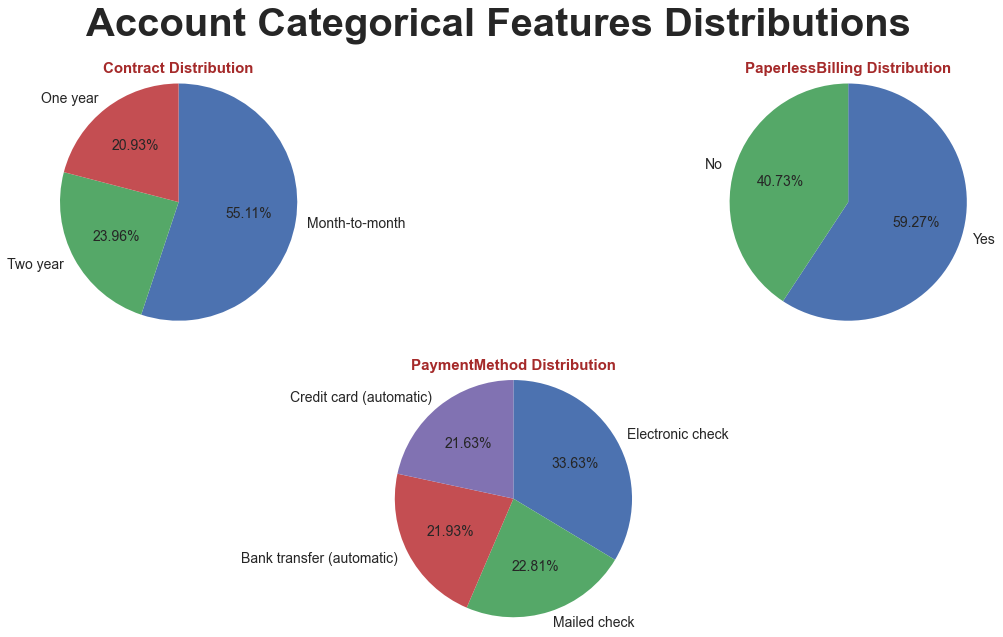

In [37]:
fig = plt.figure(figsize=(17, 10))
fig.suptitle('Account Categorical Features Distributions', fontsize=40, weight='bold')
for i, col in enumerate(Account_cols_cat[:-1]):
    sorted_counts = df[col].value_counts()
    plt.subplot(2, 3, 2*i+1)
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 14})
    plt.title(f'{col} Distribution',fontsize=15, weight='bold', color='brown', loc='center')

#### Bivariate Exploration

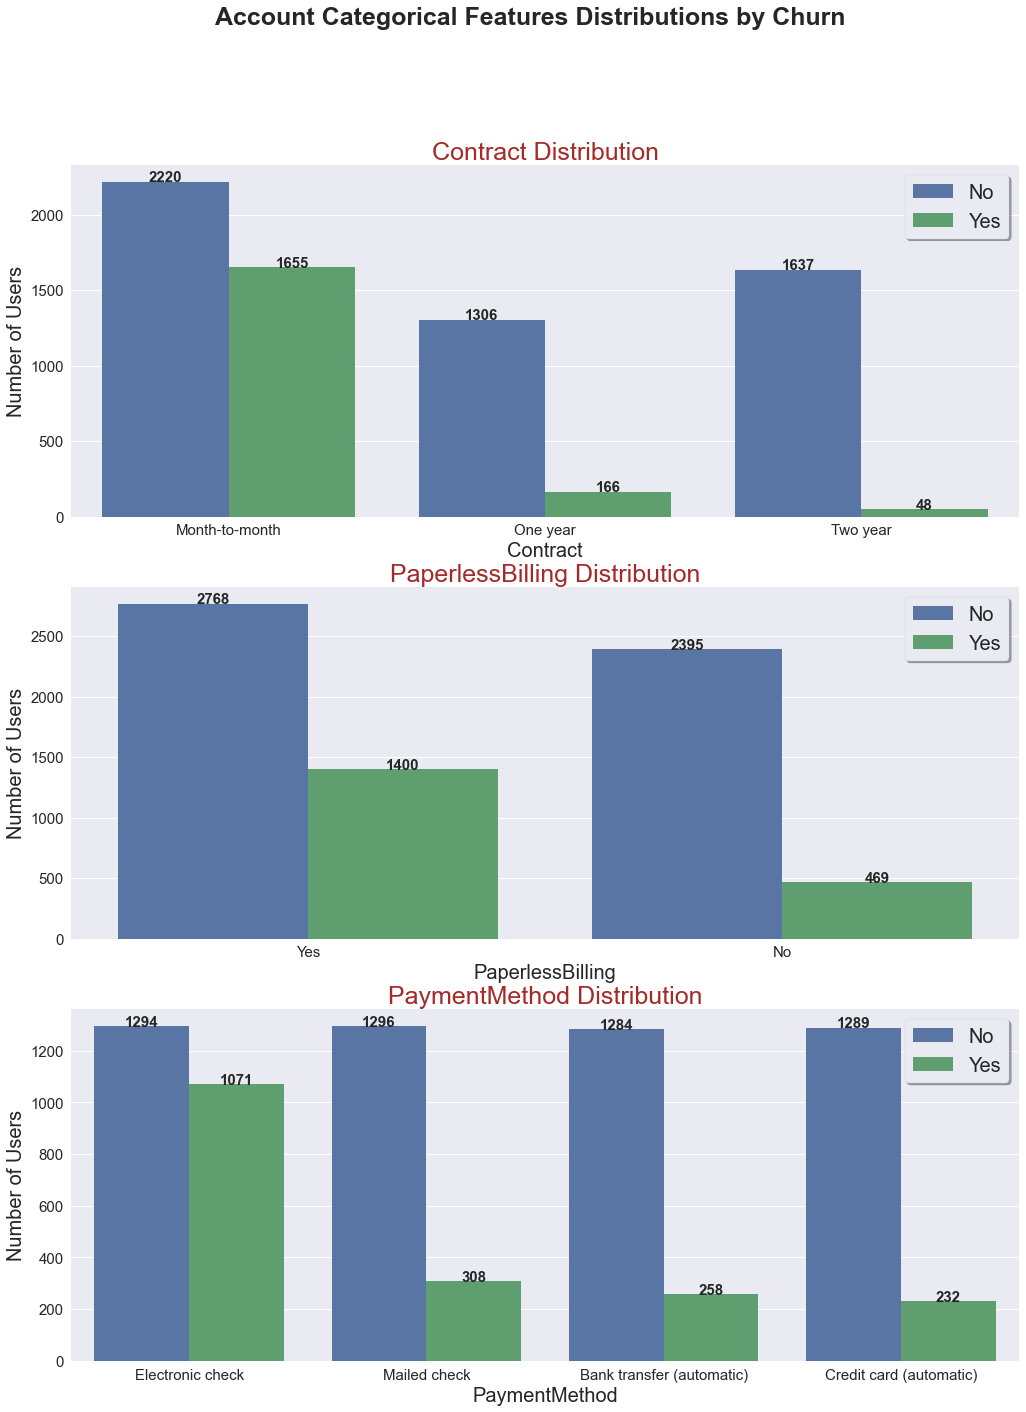

In [38]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (17,22))
fig.suptitle('Account Categorical Features Distributions by Churn', fontsize=25, weight='bold')

axes = axes.ravel()
for i, col in enumerate(Account_cols_cat[:-1]):
    fig.sca(axes[i])
    ax = sns.countplot(data=df, x=col, hue='Churn', ax=axes[i])
    
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight='bold', ha='center')
    
    plt.title(f"{col} Distribution", fontsize=25, color='brown')
    plt.xlabel(col, fontsize=20)
    plt.xticks(fontsize=15)
        
    plt.ylabel('Number of Users', fontsize=20)
    plt.yticks(fontsize=15);
    
    plt.legend(labels=list(df['Churn'].unique()),  prop={"size":20}, frameon=True, shadow=True);

### Numerical Account Features...

#### Bivariate Exploration

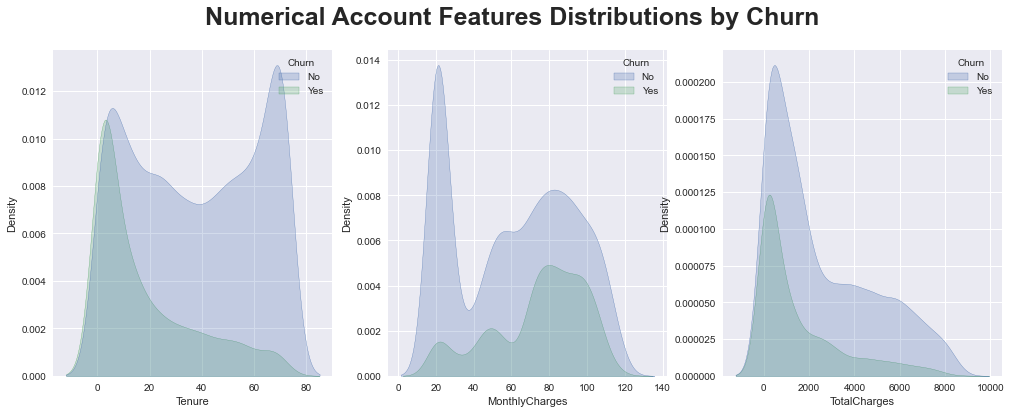

In [46]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (17,6))
fig.suptitle('Numerical Account Features Distributions by Churn', fontsize=25, weight='bold')
for i, col in enumerate(Account_cols_num[:-1]):
    sns.kdeplot(data=df, x=col, hue='Churn', ax=axes[i], shade=True)
    

#### Multi-variate Exploration

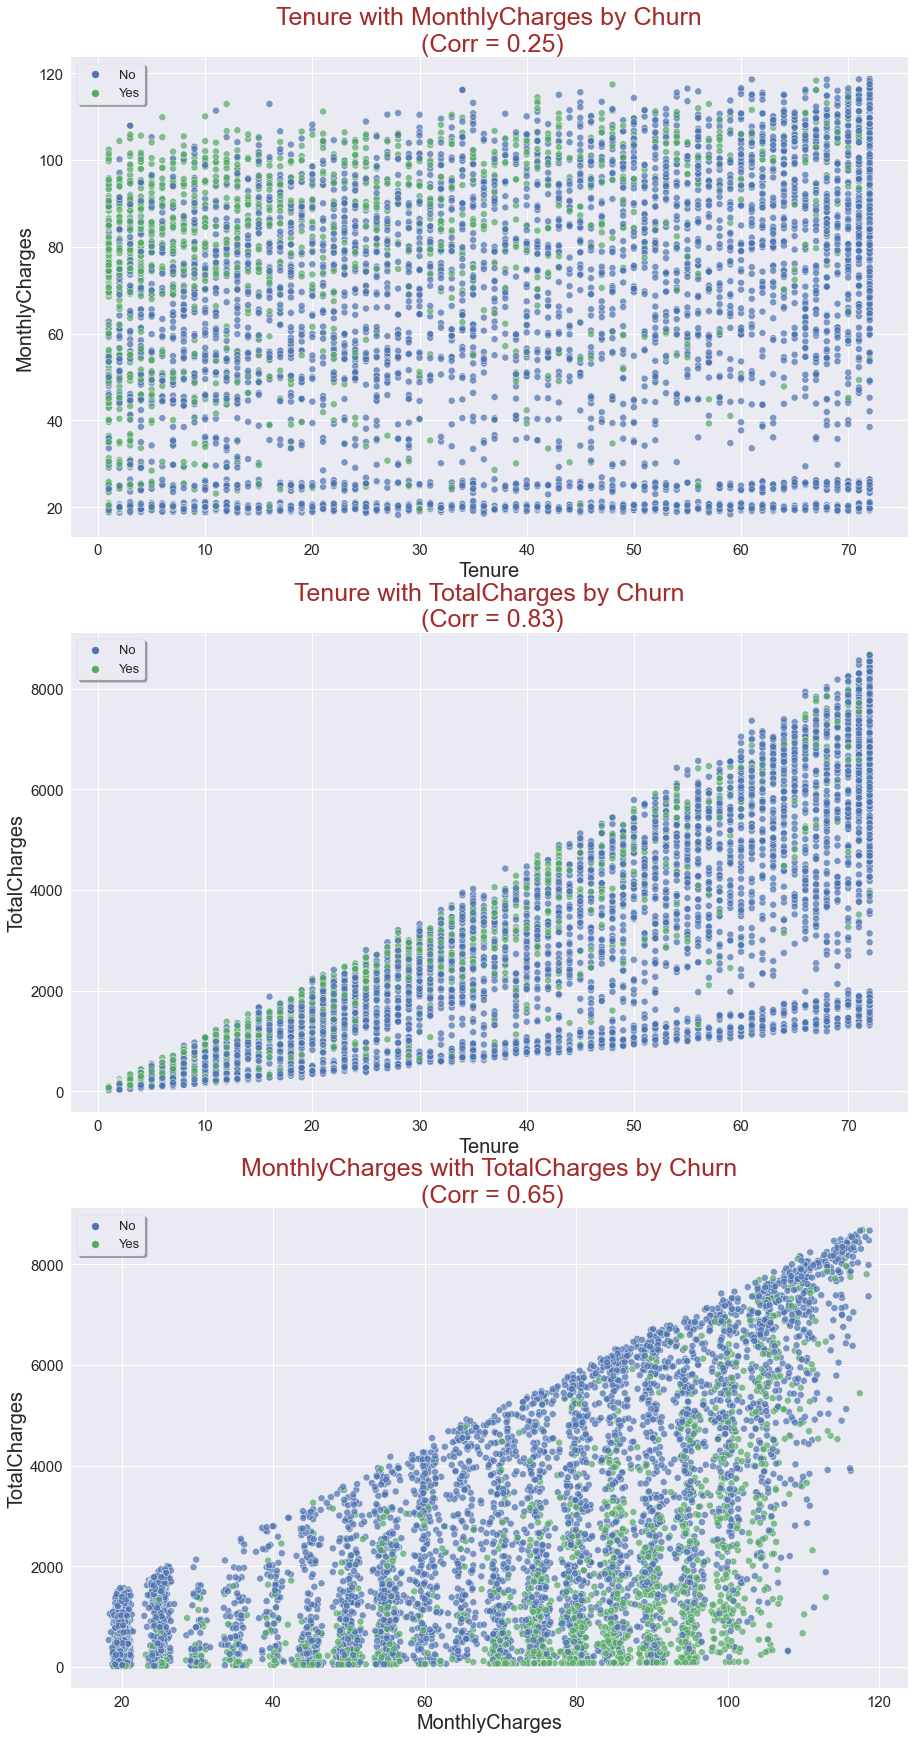

In [52]:
from itertools import combinations

fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,30))
combs = combinations(Account_cols_num[:-1], 2)
axes = axes.ravel()
for i, comb in enumerate(combs):
    fig.sca(axes[i])
    sns.scatterplot(data=df, x=comb[0], y=comb[1], hue='Churn', ax=axes[i], alpha=0.7)
    
    corr = df[comb[0]].corr(df[comb[1]])
    
    plt.title(f"{comb[0]} with {comb[1]} by Churn\n (Corr = {corr:.2f})", fontsize=25, color='brown')
    
    
    # Editing axes labels
    plt.xlabel(comb[0], fontsize=20)
    plt.xticks(fontsize=15)
    
    plt.ylabel(comb[1], fontsize=20)
    plt.yticks(fontsize=15);

    plt.legend(prop={"size":13}, frameon=True, shadow=True);